# WEEK 7
### Name: Manas Goel
### regno: 230968160

## EXERCISE 2 : Text Analysis
## Download the amazon_baby.zip file and answer the following 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from textblob import TextBlob
import nltk
nltk.download('brown')
nltk.download('punkt_tab')
df=pd.read_csv("amazon_baby.csv")

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\rznsh\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rznsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## 1. Check the number of the reviews received for each product

In [48]:
df.groupby(['name']).count().loc[:,['review']]

,review
name,
# 1 Digital Baby Thermometer - With FREE LIFETIME GUARANTEE: Using Non-Contact Infra Red (IR) Technology giving you instant and accurate temperature readings - Protect your BABY from FEVER and ILLNESS by using the DUAL Colour Digital Display and AUDIO ALARM function. Instant temperature reading from Baby Forehead within 1cm to 6cm distance - AUDIO Warning will trigger when temperature exceeds (37.5&#8451;) - Built in Memory to store 20 Readings - Fully FDA Approved &amp; (C.E.) Rated for Safety - Sold in one neat compact size 0.23kg weight. Durable Silicone touch buttons for durability - The non-contact design allows an instant temperature reading while your baby is sleeping. Can also be used to take the temperature of Baby Milk Bottles - In STOCK &amp; SHIPS today for FREE with Amazon.com,4
"#1 Adjustable Back Seat Baby Safety Mirror - Easy To Fit - Mirror Attaches In Seconds To Rear Seat Head Rest And Rotates And Pivots For A Clear View - Designed To Help You See Your Baby When They Are In A Reward Facing Car Seat, Without You Having To Turn Your Head Whilst Driving - No Obstruction To Rear View Visibility - High Quality Material - Best Life Time Guarantee - Top Selling Baby Safety Product From Happy Snuggle",1
"#1 Baby Bottle Brush for All Types of Bottles &#9733; Baby Feeder Nipple Cleaner Brush with Small, Long Plastic Grip Hanging Loop Handle &#9733; Ergonomic Safe Bristle Heads for All Types of Water, Beer, Wine Bottles and Cups &#9733; Best Bottle Cleaner for All Types of Small and Long Bottles with Narrow Neck &#9733; Finest Nipple Brush and Best Feeder Brush for Baby Bottles &#9733; Order High Quality Product with Lifetime Guarantee &#9733;",3
"#1 Premium Baby Nasal Aspirator by Cutietots - The Snot Sucker That Clears Away Baby\'s Stuffy Nose Gently and Instantly - Easy to Clean, Hygienic, BPA and Latex FREE - Great for Baby Showers with Its Lovely Packaging - Works Well with Nasal Saline Solutions - 100% Satisfaction Money Back Guarantee!!!",4
#120 - 2.5mm Dr Mom Specula Tips - Premium Quality,2
...,...
"zCush Cotton Characters Nap Mat, Googly Green",1
"zTcase&trade; Bluetooth Wireless Keyboard Case Cover for Samsung Galaxy Tab Pro 10.1 SM-T520 High Quality Folio Type for Professional and Personal Use (Tab Pro 10.1 inch, Black)",1
"zutano for aden by aden + anais 100% Cotton Muslin Burpy Bib, Walk In The Park",2


In [49]:
TextBlob(df.name[5]).noun_phrases

WordList(['stop pacifier sucking', 'thumbuddy', 'love\\', 'binky', 'puppet', 'adorable book'])

## 2. Check the products that have more than 15 reviews.


In [50]:
df2=df.groupby(['name']).count()
df2=df2[df2.review>15]
for i in range(len(df2)):
    desc=TextBlob(df2.iloc[i,:].name).noun_phrases
    try:
        print(desc[0],desc[1],desc[2])
    except:
           print(desc[0])
                

pillow hypoallergenic toddler pillow ages
cresci products window wedge per pack white
special promotion art curetm
art curetm safety knotted
art curetm safety knotted
tubing medela pump style
clinical ry230 large lcd non-contact infrared thermometer forehead surface
baby shower lotto game
sq ft. sell mats\
one-piece breastshield valve membrane
enfamil flow soft nipples
pack snack
nuk replacement silicone spout
sprouts laundry hamper
sprouts storage bin
sprouts storage
sprouts storage caddy
baby shower clothespin game
mamaroo classic- classic black
mamaroo infant seat
cleanwater infant bath tub
pack black foam microphone windscreens lifetime warranty
piece dark suit shirt
ounce pouch baby
black baby furniture corner safety bumper corner protector
mhz
auto adapter car vehicle lighter medela pump-in-style replaces part packaging
alex bathtime fun hoops tub
aden anais issie blanket set declan elephants
aden aden + anais muslin swaddle blanket
aden
aden aden + anais muslin burpy bib
aden ad

## 3. Find any missing review are present or not, If present remove those data.

In [51]:
df.isnull().sum(axis='columns').sum()

np.int64(4463)

In [52]:
df=df.drop(df[df.isnull().sum(axis='columns')>0].index,axis='index')

In [53]:
df.isnull().sum(axis='columns').sum()

np.int64(0)

## 4. Clean the data and remove the special characters and replace the contractions with its expansion by converting the uppercase character to lower case. Also, remove the punctuations.

In [54]:
def expand(text):
    if isinstance(text, str): 
        contractions={
            "a'ight":"alright",
            "ain't":"are not",
            "amn't":"am not",
            "aren't":"are not",
            "can't":"cannot",
            "'cause": "because",
            "could've":"could have",
            "couldn't":"could not",
            "couldn't've":"could not have",
            "daren't":"dare not",
            "daresn't":"dare not",
            "dasn't":"dare not",
            "didn't":"did not",
            "doesn't":"does not",
            "don't":"do not",
            "everybody's":"everybody is",
            "everyone's":"everyone is",
            "giv'n":"given",
            "gonna":"going to",
            "gon't":"go not", 
            "gotta":"got to",
            "hadn't":"had not",
            "had've":"had have",
            "hasn't":"has not",
            "haven't":"have not",
            "he'd":	"he had", 
            "he'll":"he will",
            "he's":	"he is",
            "here's":"here is",
            "how'd":"how did",
            "how'll":"how will",
            "how're":"how are",
            "how's":"how is",
            "I'd":"I had",
            "I'd've":"I would have",
            "I'd'nt":"I would not",
            "I'd'nt've":"I would not have",
            "I'll":"I will",
            "I'm":"I am",
            "I've":"I have",
            "isn't":"is not",
            "it'd":"it would",
            "it'll":"it will",
            "it's":"it is",
            "let's":"let us",
            "ma'am":"madam",
            "mayn't":"may not",
            "may've":"may have",
            "mightn't":"might not",
            "might've":"might have",
            "mustn't":"must not",
            "mustn't've":"must not have",
            "must've":"must have",
            "needn't":"need not",
            "needn't've":"need not have",
            "o'clock":"of the clock",
            "oughtn't":"ought not",
            "oughtn't've":"ought not have",
            "shan't":"shall not",
            "she'd":"she would",
            "she'll":"she will",
            "she's":"she is",
            "should've":"should have",
            "shouldn't":"should not",
            "shouldn't've":"should not have",
            "somebody's":"somebody is",
            "someone's":"someone is",
            "something's":"something is",
            "so're":"so are",
            "so’s":"so is",
            "so’ve":"so have",
            "that'll":"that will",
            "that're":"that are",
            "that's":"that is",
            "that'd":"that would",
            "there'd":"there would",
            "there'll":"there will",
            "there're":"there are",
            "there's":"there is",
            "these're":"these are",
            "these've":"these have",
            "they'd":"they would",
            "they'll":"they will",
            "they're":"they are",
            "they've":"they have",
            "this's":"this is",
            "those're":"those are",
            "those've":"those have",
            "to've":"to have",
            "wasn't":"was not",
            "we'd":"we would",
            "we'd've":"we would have",
            "we'll":"we will",
            "we're":"we are",
            "we've":"we have",
            "weren't":"were not",
            "what'd":"what did",
            "what'll":"what will",
            "what're":"what are",
            "what's":"what is",
            "what've":"what have",
            "when's":"when is",
            "where'd":"where did",
            "where'll":"where will",
            "where're":"where are",
            "where's":"where is",
            "where've":"where have",
            "which'd":"which would",
            "which'll":"which will",
            "which're":"which are",
            "which's":"which is",
            "which've":"which have",
            "who'd":"who would",
            "who'd've":"who would have",
            "who'll":"who will",
            "who're":"who are",
            "who's":"who is",
            "who've":"who have",
            "why'd":"why did",
            "why're":"why are",
            "why's":"why is",
            "won't":"will not",
            "would've":"would have",
            "wouldn't":"would not",
            "wouldn't've":"would not have",
            "y'at":"you at",
            "yes’m":"yes madam",
            "you'd":"you would",
            "you'll":"you will",
            "you're":"you are",
            "you've":"you have"}
        for contraction, expansion in contractions.items():
            text = text.replace(contraction, expansion)
        
        text = ''.join(char for char in text if char.isalnum() or char.isspace())
    
        text = text.lower()
        
        return text
    else:
        return text  

df['review'] = df['review'].apply(expand)
df['name'] = df['name'].apply(expand)
df


,name,review,rating,Polarity,Review Length,Word Count,Average Word Length
0,planetwise flannel wipes,these flannel wipes are ok but in my opinion n...,3,0.083333,452.0,79.0,5.721519
1,planetwise wipe pouch,it came early and was not disappointed i love ...,5,0.367000,158.0,30.0,5.266667
2,annas dream full quilt with 2 shams,very soft and comfortable and warmer than it l...,5,0.293333,143.0,23.0,6.217391
3,stop pacifier sucking without tears with thumb...,this is a product well worth the purchase i h...,5,0.318767,390.0,74.0,5.270270
4,stop pacifier sucking without tears with thumb...,all of my kids have cried nonstop when i tried...,5,0.803299,405.0,76.0,5.328947
...,...,...,...,...,...,...,...
183526,baby teething necklace for mom pretty donut sh...,such a great idea very handy to have and look ...,5,0.626000,138.0,27.0,5.111111
183527,baby teething necklace for mom pretty donut sh...,this product rocks it is a great blend of fun...,5,0.440625,354.0,64.0,5.531250
183528,abstract 2 pk baby toddler training cup pink,this item looks great and cool for my kidsi kn...,5,0.650000,93.0,17.0,5.470588
183529,baby food freezer tray bacteria resistant bpa...,i am extremely happy with this product i have ...,5,0.379694,854.0,170.0,5.023529


## 5. Add the Polarity, length of the review, the word count and average word length of each review.

In [55]:
def metrics(review):
    if isinstance(review, str):
        polarity = TextBlob(review).sentiment.polarity
        length = len(review)
        words = review.split()
        word_count = len(words)
        average_word_length = length / word_count if word_count > 0 else 0
        
        return pd.Series([polarity, length, word_count, average_word_length])
    else:
        return pd.Series([None, None, None, None])


df[['Polarity', 'Review Length', 'Word Count', 'Average Word Length']] = df['review'].apply(metrics)
df

,name,review,rating,Polarity,Review Length,Word Count,Average Word Length
0,planetwise flannel wipes,these flannel wipes are ok but in my opinion n...,3,0.083333,443.0,79.0,5.607595
1,planetwise wipe pouch,it came early and was not disappointed i love ...,5,0.367000,154.0,30.0,5.133333
2,annas dream full quilt with 2 shams,very soft and comfortable and warmer than it l...,5,0.293333,137.0,23.0,5.956522
3,stop pacifier sucking without tears with thumb...,this is a product well worth the purchase i h...,5,0.318767,380.0,74.0,5.135135
4,stop pacifier sucking without tears with thumb...,all of my kids have cried nonstop when i tried...,5,0.577778,392.0,76.0,5.157895
...,...,...,...,...,...,...,...
183526,baby teething necklace for mom pretty donut sh...,such a great idea very handy to have and look ...,5,0.546000,133.0,27.0,4.925926
183527,baby teething necklace for mom pretty donut sh...,this product rocks it is a great blend of fun...,5,0.440625,347.0,64.0,5.421875
183528,abstract 2 pk baby toddler training cup pink,this item looks great and cool for my kidsi kn...,5,0.650000,86.0,17.0,5.058824
183529,baby food freezer tray bacteria resistant bpa...,i am extremely happy with this product i have ...,5,0.379694,846.0,170.0,4.976471


## 6. Visualize the distribution of the word count, review length, and polarity

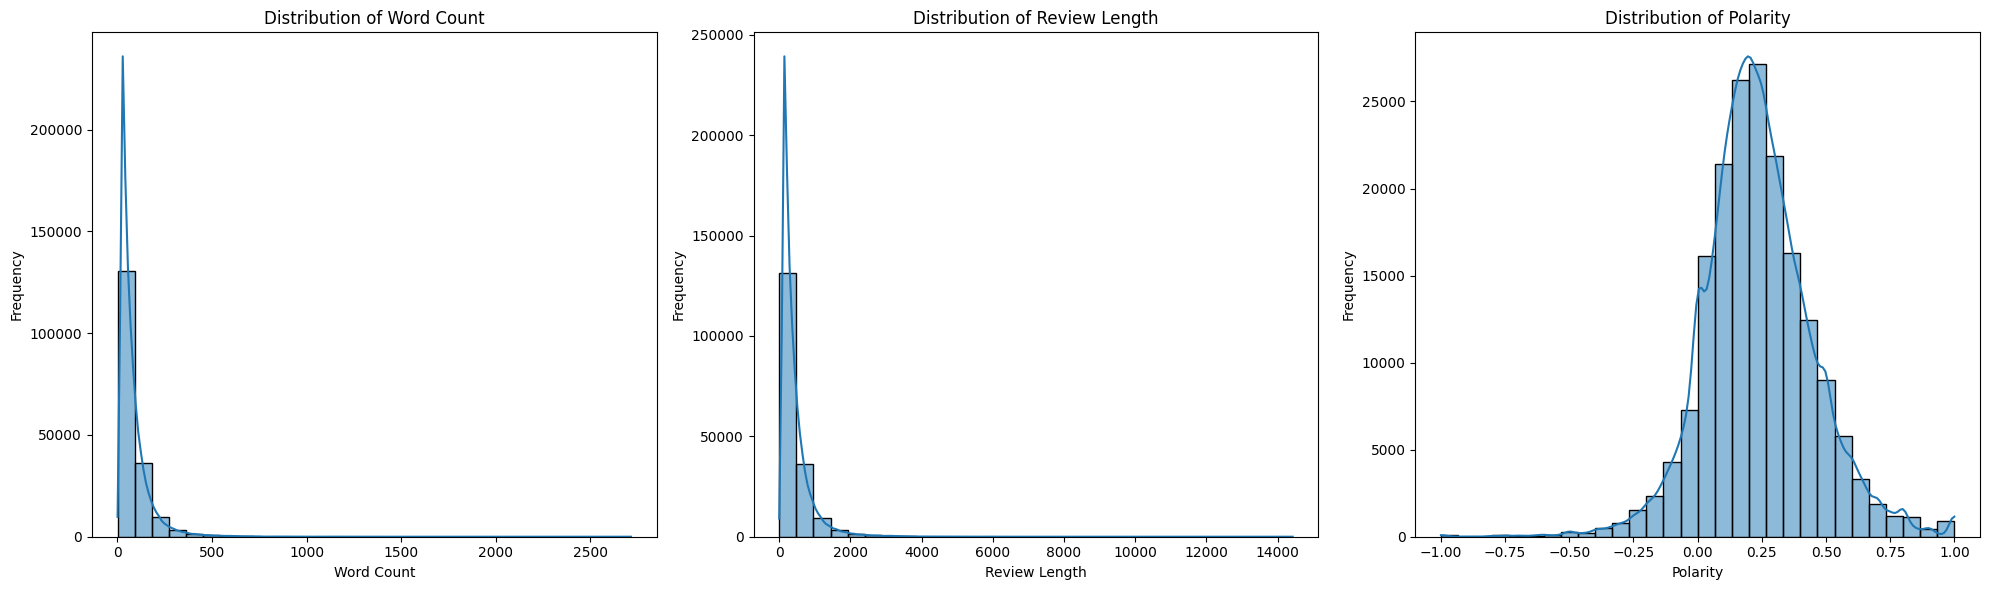

In [30]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['Word Count'], bins=30, kde=True)
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')


plt.subplot(1, 3, 2)
sns.histplot(df['Review Length'], bins=30, kde=True)
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Frequency')


plt.subplot(1, 3, 3)
sns.histplot(df['Polarity'], bins=30, kde=True)
plt.title('Distribution of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

## 7. Visualize polarity considering the rating.

<Axes: xlabel='rating', ylabel='Polarity'>

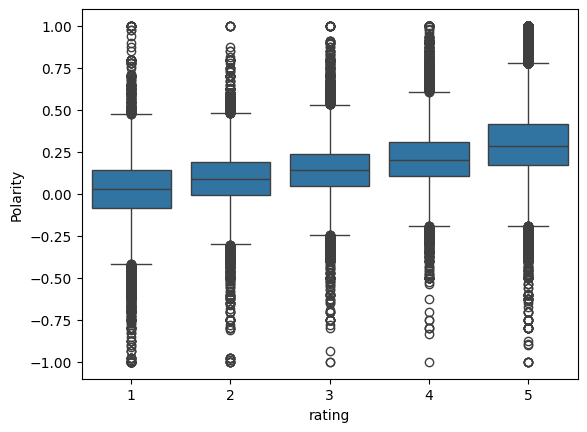

In [36]:
sns.boxplot(x='rating', y='Polarity', data=df)

## 8. Visualize the count of the reviews of each rating available in the dataset.

<Axes: xlabel='rating', ylabel='count'>

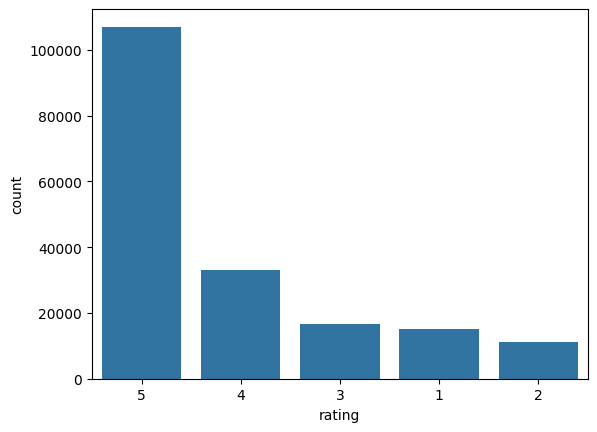

In [37]:
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)

## 9. List the Top 20 products based on the polarity.

In [39]:
df.sort_values(["Polarity"],ascending=False).head(20)

,name,review,rating,Polarity,Review Length,Word Count,Average Word Length
42866,PRIMO Freedom Step Stool Blue,These stools are inexpensive and sturdy. We h...,5,1.0,151.0,27.0,5.592593
42944,Mommy\'s Helper Slide-Lok Bi-Fold Door Lock,these work great!,5,1.0,17.0,3.0,5.666667
48961,"Sugarbooger Baby Closet Dividers, Peek-A-Boo Blue",these closet dividers are just perfect for a c...,5,1.0,135.0,26.0,5.192308
176039,"Megaseat Play and Snack Tray, White",Perfect,5,1.0,7.0,1.0,7.000000
175741,Joy Baby Ladybug Costume Handmade Crochet Knit...,It came out just as pictured and well made. I ...,5,1.0,116.0,23.0,5.043478
22930,Fisher-Price Aquarium Take-Along Swing,This is a great swing! No gripes!It makes baby...,5,1.0,110.0,20.0,5.500000
99261,Munchkin Five Multi Cups,This is just what I needed for my 3 munchkins ...,5,1.0,146.0,31.0,4.709677
111313,"Regalo Guardian Expandable Gate, White",Run don\'t walk if you need a gate because thi...,5,1.0,189.0,39.0,4.846154
49341,"CoCaLo Switch Plate, Sports Fan",Looks great!,4,1.0,12.0,2.0,6.000000
49479,Graco Humidifier Replacement Filter for 4.0 Ga...,This is a perfect replacement for the filter i...,5,1.0,143.0,28.0,5.107143


## 10. Visualize to check whether the review length changes with rating.


<Axes: xlabel='rating', ylabel='Review Length'>

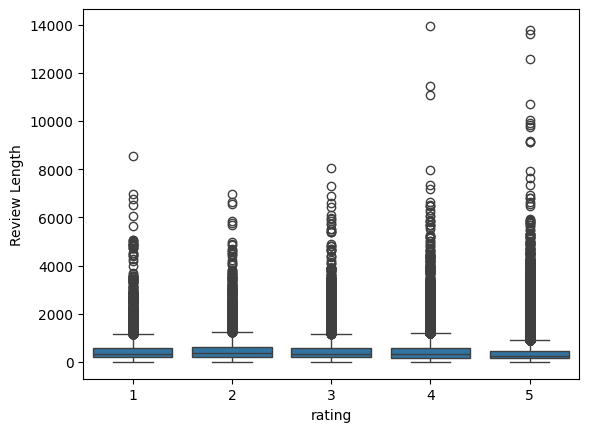

In [56]:
sns.boxplot(x='rating', y='Review Length', data=df)

## 11. Visualize the distribution of Top 25 Unigram, Bigram and Trigram.

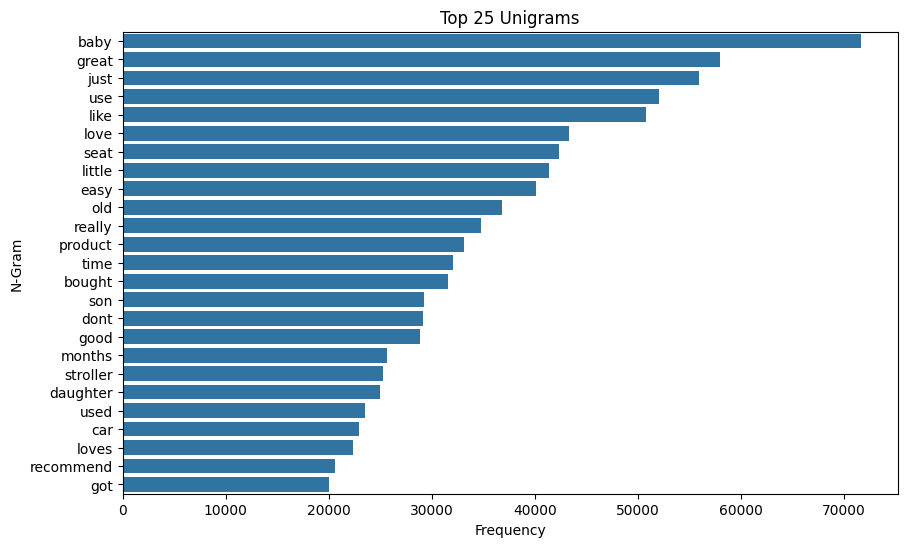

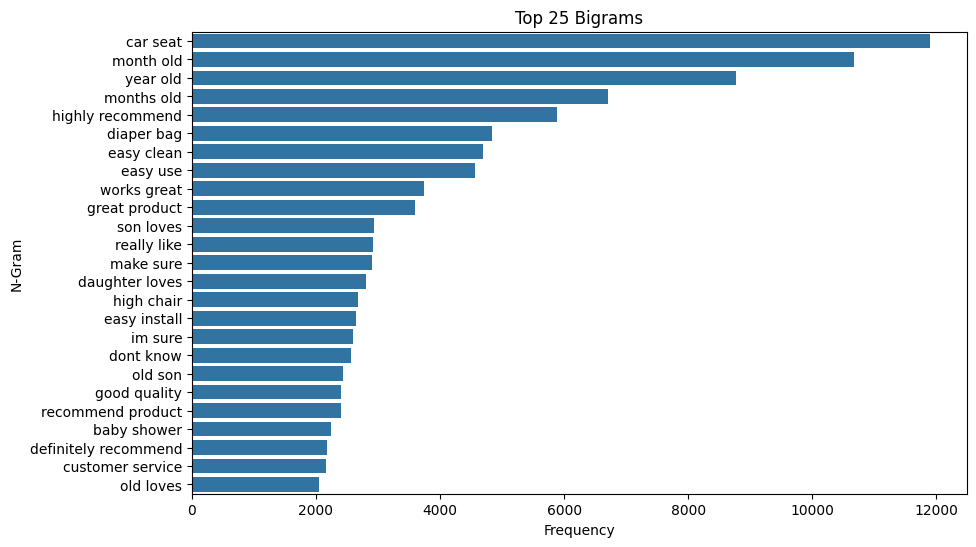

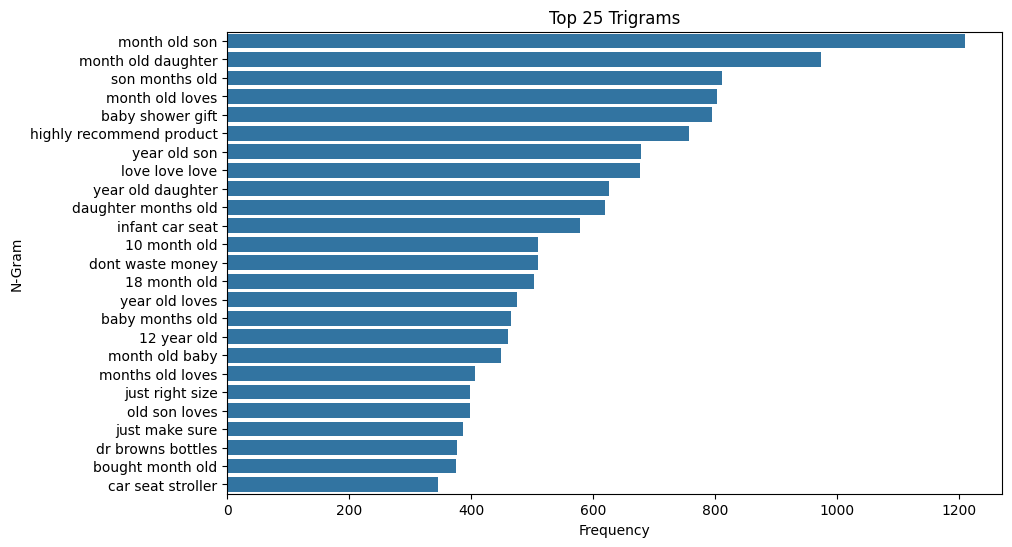

In [57]:
def plot_top_n_grams(n, title):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    n_grams = vectorizer.fit_transform(df['review'])
    sum_n_grams = n_grams.sum(axis=0)
    n_grams_freq = [(word, sum_n_grams[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    n_grams_freq = sorted(n_grams_freq, key=lambda x: x[1], reverse=True)[:25]
    
    n_grams_df = pd.DataFrame(n_grams_freq, columns=['N-Gram', 'Frequency'])
    
    # Set up the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='N-Gram', data=n_grams_df)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('N-Gram')
    plt.show()

# Plotting the top 25 unigrams, bigrams, and trigrams
plot_top_n_grams(1, 'Top 25 Unigrams')
plot_top_n_grams(2, 'Top 25 Bigrams')
plot_top_n_grams(3, 'Top 25 Trigrams')
